In [1]:
# Importar librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# Importar base de datos escalados
data = pd.read_csv("data_scaled2.csv")

In [3]:
seed = 5
data_sample = data.sample(frac=0.01,random_state=seed)

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


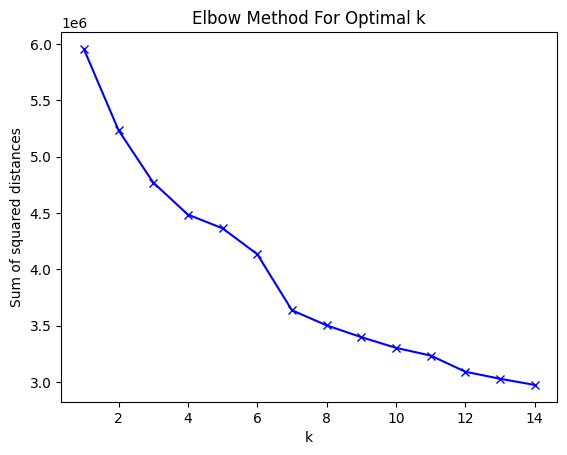

In [4]:
# Método Elbow
sum_of_squared_distances=[]
for k in range(1,15):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    kmeans = kmeans.fit(data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 2, silhouette score is 0.13244072439432783)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 3, silhouette score is 0.10134323690220595)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 4, silhouette score is 0.15294733295442647)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 5, silhouette score is 0.14731118141306088)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 6, silhouette score is 0.1282323305515532)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 7, silhouette score is 0.13152369331466346)


c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


For n_clusters = 8, silhouette score is 0.12983588912993008)


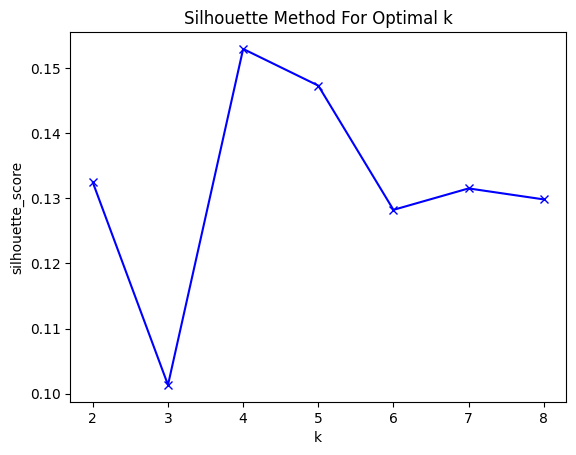

In [5]:
# Método silhouette score
silhouette_score_list = []
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_clusters in range(2,9):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=seed)
    # Fit and predict your k-Means object
    preds = kmeans.fit_predict(data_sample)
    score = silhouette_score(data_sample, preds, metric='euclidean')
    silhouette_score_list.append(score)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

# Plot
plt.plot(range(2,9), silhouette_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

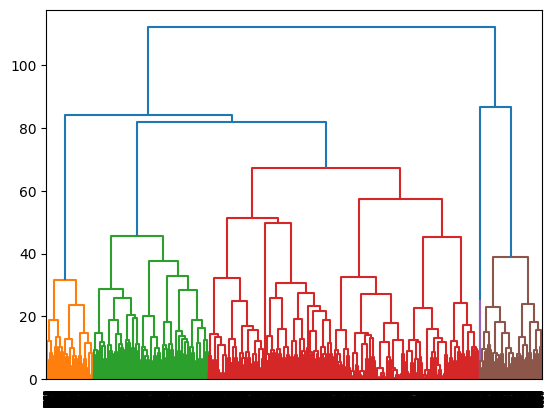

2


In [6]:
# Método dendrogramas
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_sample, method='ward', metric="euclidean"))
plt.show()

# Create clusters and fit
hc = AgglomerativeClustering(metric='euclidean', linkage='ward')
hc.fit(data_sample)
print(hc.n_clusters_)

In [7]:
# Implementar algoritmo de clustering KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state = seed, n_init="auto")
kmeans.fit(data)
data["cluster"] = kmeans.labels_

data["cluster"].value_counts()

cluster
3    365611
1    178376
0    165524
2    110422
Name: count, dtype: int64

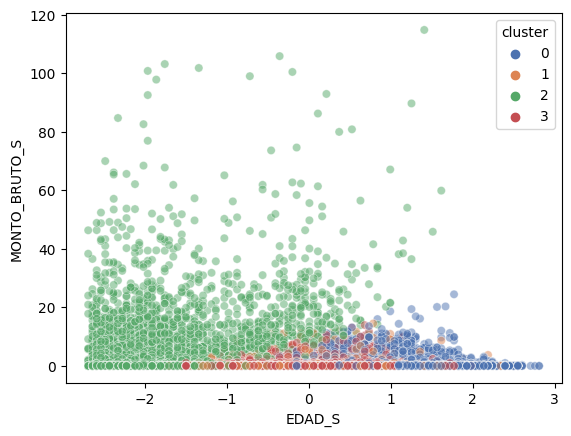

In [8]:
sns.scatterplot(x="EDAD_S", y="MONTO_BRUTO_S", data=data, hue="cluster", alpha=0.5, palette="deep")
plt.show()

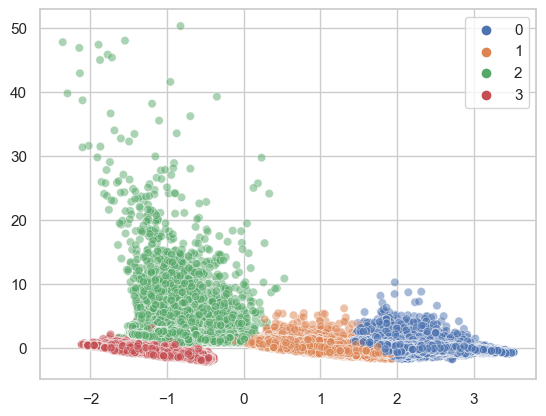

In [19]:
# Implementar algoritmo de reducción de dimensión PCA
from sklearn.decomposition import PCA

model = PCA(n_components=2, random_state=seed)
model = model.fit(data)
features = model.transform(data)
xs = features[:,0]
ys = features[:,1]
sns.scatterplot(x=xs, y=ys, hue=data["cluster"].values, alpha=0.3, palette="deep")
plt.show()

In [20]:
# Varianza explicada PCA = 2
model.explained_variance_ratio_

array([0.23928525, 0.1311315 ])

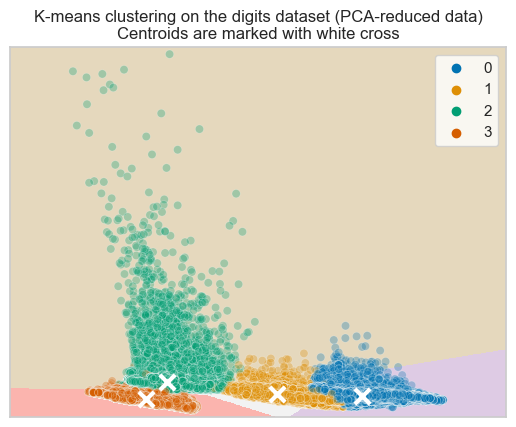

In [87]:
kmeans2 = KMeans(n_clusters=4, n_init="auto", random_state=seed)
kmeans2.fit(features)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap="Pastel1",
    aspect="auto",
    origin="lower",
)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=data["cluster"].values, alpha=0.3, palette="colorblind")
#plt.plot(features2[:, 0], features2[:, 1], "k.", c=kmeans2.labels_, markersize=2)
# Plot the centroids as a white X
centroids = kmeans2.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=120,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

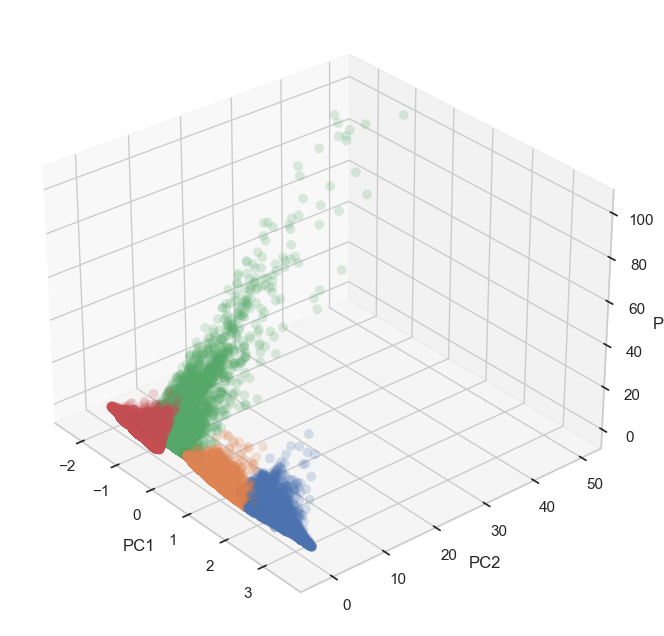

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Aplicar PCA
model1 = PCA(n_components=3, random_state=seed)
model1 = model1.fit(data)
features1 = model1.transform(data)

# Definir la paleta de colores utilizando "deep"
palette = sns.color_palette("deep", n_colors=len(data['cluster'].unique()))

# Crear un gráfico de dispersión en 3D con Seaborn y Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Asignar colores manualmente utilizando la paleta
scatter = ax.scatter(features1[:, 0], features1[:, 1], features1[:, 2], 
                     c=[palette[i] for i in data['cluster']], 
                     s=50, alpha=0.2, edgecolors='none')  # Establecer bordes blancos

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.view_init(elev=30, azim=-40)

plt.show()


In [36]:
# Varianza explicada PCA = 3
model1.explained_variance_ratio_

array([0.23928525, 0.1311315 , 0.11177363])

In [17]:
#data.to_csv("data_labeled.csv", index=False)